In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# START

## Data Cleaning

In [13]:
#  load nbaPlayersAllTimesAgilityData.csv and nbaPlayersAllTimesInfoData
dfAg = pd.read_csv('nbaPlayersAllTimesAgilityData.csv')
dfIn = pd.read_csv('nbaPlayersAllTimesInfo.csv')

#  remove ' ' from column names /!\ invisible characters
dfAg.columns = dfAg.columns.str.replace(' ', ' ')
dfIn.columns = dfIn.columns.str.replace(' ', ' ')

# remane colum Player to PLAYER
dfIn = dfIn.rename(columns={'Player': 'PLAYER'})

# remove space in player
dfAg['PLAYER'] = dfAg['PLAYER'].str.replace(' ', '')
dfIn['PLAYER'] = dfIn['PLAYER'].str.replace(' ', '')

# create array with player, height, weight from dfIn and Max Vertical Leap (inches) from dfAg
dfAg = dfAg[['PLAYER', 'Max Vertical Leap (inches)', 'Standing Vertical Leap (inches)']]
dfIn = dfIn[['PLAYER', 'Height', 'Weight']]

# remove duplicates
dfAg = dfAg.drop_duplicates(subset=['PLAYER'], keep='first')
dfIn = dfIn.drop_duplicates(subset=['PLAYER'], keep='first')

# merge dfIn and dfAg where PLAYER exist in both
df = pd.merge(dfIn, dfAg, on='PLAYER')



# remove line where where a value is not set
df = df[df['Max Vertical Leap (inches)'] != '-']
df = df[df['Max Vertical Leap (inches)'] != 0]
df = df[df['Standing Vertical Leap (inches)'] != '-']
df = df[df['Standing Vertical Leap (inches)'] != 0]
df = df[df['Height'] != '-']
df = df[df['Height'] != 0]
df = df[df['Weight'] != '-']
df = df[df['Weight'] != 0]



# convert inch to meters and round to decimal
df['Max Vertical Leap (inches)'] = df['Max Vertical Leap (inches)'].apply(pd.to_numeric)
df['Max Vertical Leap (meters)'] = round(df['Max Vertical Leap (inches)'] * 0.0254, 2)

# convert inch to meters and round to decimal
df['Standing Vertical Leap (inches)'] = df['Standing Vertical Leap (inches)'].apply(pd.to_numeric)
df['Standing Vertical Leap (meters)'] = round(df['Standing Vertical Leap (inches)'] * 0.0254, 2)

# convert height to meters and round to decimal
df['Height'] = df['Height'].apply(pd.to_numeric)
df['Height'] = round(df['Height'] / 100, 2)

# add max jump height in meters
df['Max Jump Height (meters)'] = round(df['Max Vertical Leap (meters)'] + df['Height'], 2)

# get correlation
df1 = df[['Max Jump Height (meters)', 'Standing Vertical Leap (meters)','Max Vertical Leap (meters)', 'Height', 'Weight']]
df1 = df1.corr()

## Data Analysis

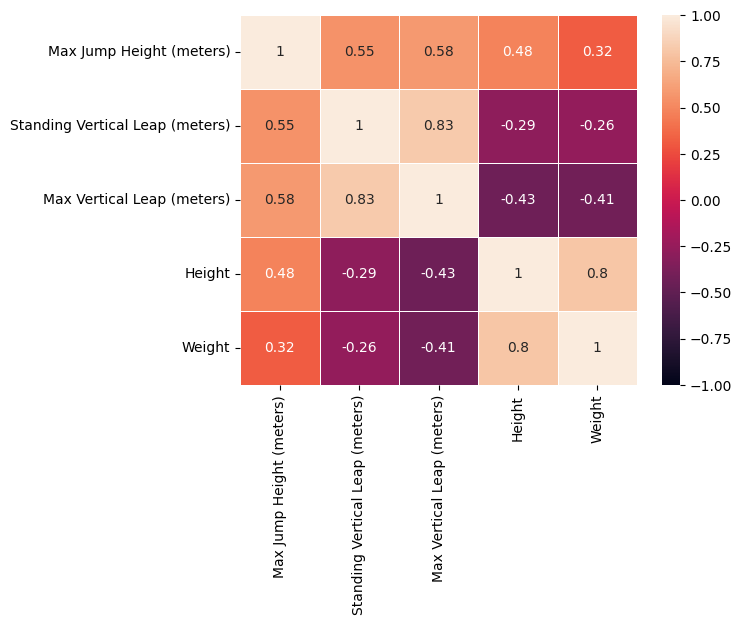

In [12]:
# plot correlation
sns.heatmap(df1, annot=True, vmin=-1, vmax=1,linewidths=.5)
plt.show()

> - interessant on voit que le poids a un petit impact positif sur la hauteur de saut (max jump height)
> - le poids a aussi un faible impact négatif sur la hauteur de saut (max vertical leap)
> - mais un faible impact positif sur la hauteur de saut (max jump height)
> - or la taille a un impact positif sur la hauteur de saut (max jump leap)
> - et le poid est fortement corrélé a la taille
> - donc le joueur grand on un desavantage sur le saut (sol -> pied) mais qui est compensé par un avantage sur le saut (sol -> tete)

In [8]:
# find the player heights for the top 10 max jump height
df2 = df.sort_values(by=['Max Vertical Leap (meters)'], ascending=False)
df2 = df2.head(10)
df2 = df2[['PLAYER', 'Max Jump Height (meters)','Max Vertical Leap (meters)', 'Height', 'Weight']]


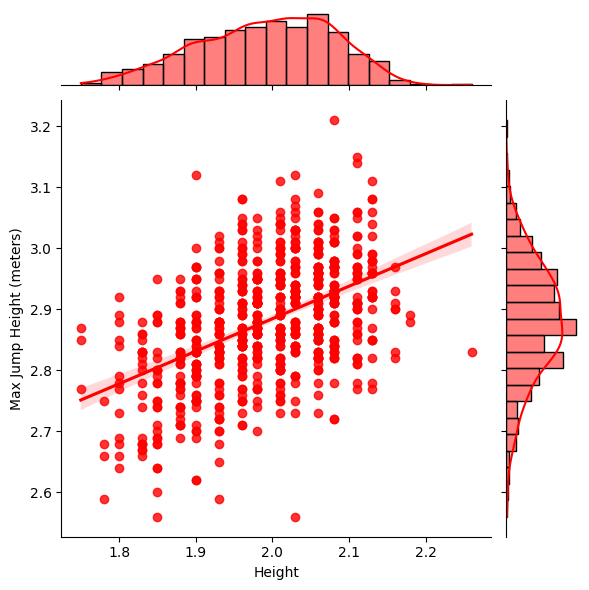

In [9]:
# on voit que les joueurs qui sautent le plus haut(sol tete) ne sont pas ceux qui sautent le plus haut (sol pieds) meme s'il y correlation
sns.jointplot(x='Height', y='Max Jump Height (meters)', data=df, kind='reg', color='r')
plt.show()

> - la taille est un avantage au debut puis apres une certaine taille c'est un desavantage
>
> - plus on est grand plus on saute haut (sol -> tete) mais arrivé a une certaine taille on perd en hauteur de saut (sol -> pied)

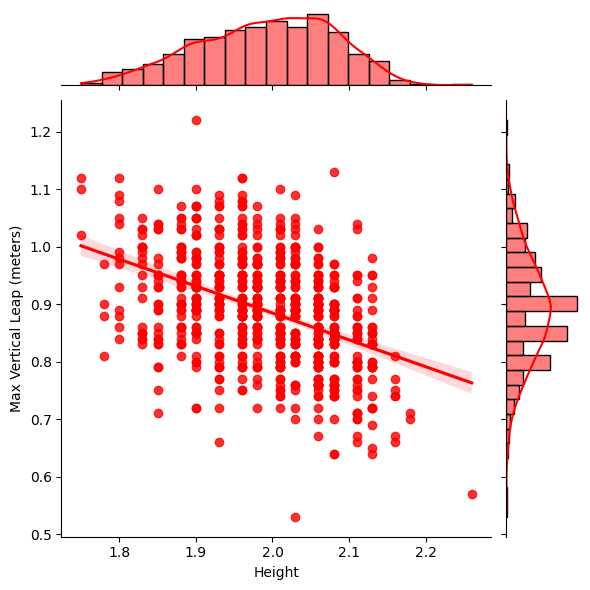

In [10]:
sns.jointplot(x='Height', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r')
plt.show()

> au contraire la taille semble toujours etre un desavantage pour la hauteur de saut (sol -> pied)

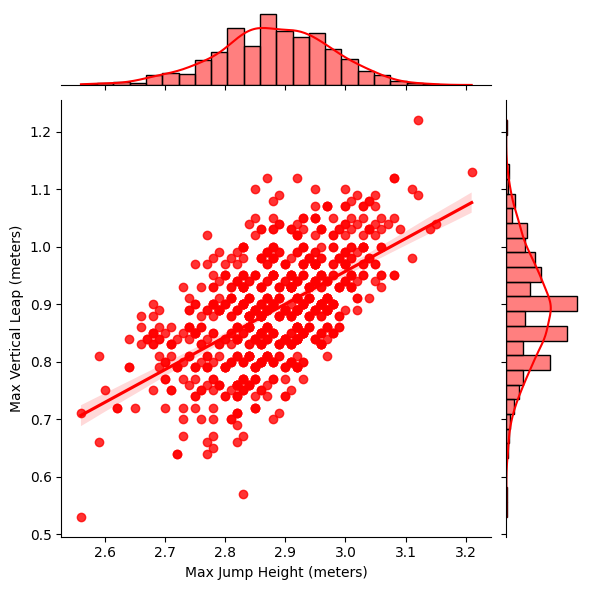

In [11]:
sns.jointplot(x='Max Jump Height (meters)', y='Max Vertical Leap (meters)', data=df, kind='reg', color='r')
plt.show()

> - on voit aussi que les joueurs qui sautent haut (sol -> pied) sont ceux qui sautent haut (sol -> tete)

conclusion l'avantage donnée par la taille est compensé par un desavantage sur le saut (sol -> pied)